In [69]:
### BGD: 
# Go through all training samples and cal. individual losses
# compute the cumulative error for all samples after a single epoch
# backprop the error and adjust weights
# very slow for large number of samples ---> too much computation
# smooth convergence

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv("Datasets/Housing.csv")
df = df[["price","area", "bedrooms"]]
df.head()

,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4


In [71]:
### scaling data

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_x = scaler_x.fit_transform(df.drop(["price"], axis=1))
scaled_y = scaler_y.fit_transform(df[["price"]])

In [72]:
scaled_x

array([[0.39656357, 0.6       ],
       [0.5024055 , 0.6       ],
       [0.57113402, 0.4       ],
       ...,
       [0.13539519, 0.2       ],
       [0.08659794, 0.4       ],
       [0.15120275, 0.4       ]], shape=(545, 2))

In [73]:
scaled_y

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [74]:
def batch_grad_desc(x, y_true, epochs, learning_rate=0.001):
    num_fetures = x.shape[1] # num of cols
    bias = 0
    weights = np.ones(shape=(num_fetures))
    total_samples = x.shape[0] # rows
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(weights, scaled_x.T) + bias
        weights_pd = -(2/total_samples) * (x.T.dot(y_true-y_pred))
        bias_pd = -(2/total_samples) * np.sum(y_true-y_pred)

        weights = weights - learning_rate*weights_pd
        bias = bias - learning_rate*bias_pd

        cost = np.mean(np.square(y_true - y_pred))

        if i%2==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return weights, bias, cost, cost_list, epoch_list

weights, bias, cost, cost_list, epoch_list = batch_grad_desc(scaled_x, scaled_y.reshape(scaled_y.shape[0],),1000)

print(weights)
print(bias)
print(cost)


[0.91257382 0.86488175]
-0.2714076903713237
0.028223052278445983


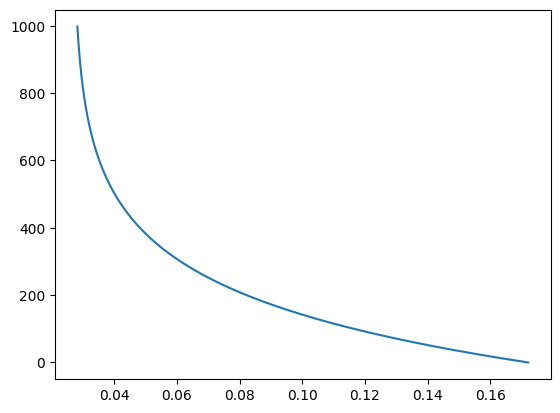

In [75]:
plt.plot(cost_list, epoch_list)

In [78]:
### prediction function based on the computed weights and biases

def predict(area, bedrooms, weights, bias):
    scaled_inp = scaler_x.transform([[area, bedrooms]])[0]
    scaled_price = weights[0]*scaled_inp[0] + weights[1]*scaled_inp[1] + bias

    unscaled_price = scaler_y.inverse_transform([[scaled_price]])[0][0]

    return unscaled_price

predict(7420, 4, weights ,bias)



np.float64(8788742.046228241)